# 04 - Baseline Model Improved

In this notebook, we are going to improve the logistic regression model.

(Also gonna work with a sample of our dataset to be able to evaluate faster the results.
Our sample is gonna be equalized/normalize by the classes, equal amount for each class)

We are gonna try:
   - different C values;
   - different solver;
   - different penality;
Evaluate the results with: Accuracy, Precision, Recall and f1


### Steps: 
 - Importing/accessing the data
 - Separeting the Train and Test Data
 - Fit the model (in this case, train the logistic regression)
 - Evaluate the model
    - Accuracy, Precision, Recall, f1  .....  Confusion Matrix 
 - Using the model to predict the specifics images

## Importing/accessing the data

First, importing the libs and treating the data:

In [2]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dataset_directory = '../datasets/dataset_normal/'

# Load and preprocess images
def load_images(directory):
    images = []
    labels = []
    for label, folder in enumerate(os.listdir(directory)):
        for filename in os.listdir(os.path.join(directory, folder)):
            img = cv2.imread(os.path.join(directory, folder, filename))
            img = cv2.resize(img, (100, 100))  # Resize image
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
            images.append(img.flatten())  # Flatten image
            labels.append(label)
    return np.array(images), np.array(labels)

# Feature extraction
images, labels = load_images(dataset_directory)

# Feature scaling (optional but recommended)
images = images / 255.0  # Scale pixel values to range [0, 1]


In [3]:
# Sanity Check
images.shape
# labels

(17092, 10000)

## Separating the Train, Validation and Test Data

Spliting data into training, validation and testing sets

In [4]:
# First balancing da dataset

from sklearn.utils import resample

# Calculate the size of the smallest class
min_class_size = min(np.bincount(labels))

# Undersampling majority classes to match the size of the minority class
X_balanced = []
y_balanced = []
for i in range(8):  # Assuming we have 8 classes
    X_class_i = images[labels == i]
    y_class_i = labels[labels == i]
    X_class_i_resampled, y_class_i_resampled = resample(X_class_i, y_class_i, n_samples=min_class_size, random_state=42)
    X_balanced.append(X_class_i_resampled)
    y_balanced.append(y_class_i_resampled)

X = np.concatenate(X_balanced)
y = np.concatenate(y_balanced)

print(X.shape)
print(y.shape)

# #-------------------------
# #-------------------------
# # Oversampling minority classes to match the size of the majority class
# # You can use techniques like SMOTE for better synthetic sampling
# # Here, I'm just duplicating existing samples
# X_train_balanced_oversampled = []
# y_train_balanced_oversampled = []
# for i in range(8):  # Assuming you have 8 classes
#     X_class_i = X_train[y_train == i]
#     y_class_i = y_train[y_train == i]
#     X_class_i_oversampled, y_class_i_oversampled = resample(X_class_i, y_class_i, n_samples=len(X_train_balanced), random_state=42)
#     X_train_balanced_oversampled.append(X_class_i_oversampled)
#     y_train_balanced_oversampled.append(y_class_i_oversampled)

# X_train_balanced_oversampled = np.concatenate(X_train_balanced_oversampled)
# y_train_balanced_oversampled = np.concatenate(y_train_balanced_oversampled)


(9712, 10000)
(9712,)


In [14]:
# Split the data into remainder and test sets
X_rem, X_test, y_rem, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Split the remainder set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_rem, y_rem, test_size=0.2, random_state=40, stratify=y_rem)

# X_rem
#   X_train
#   X_val
# X_test

# Print info on how the data has been split
print(f'The TRAIN set has {len(X_train)} data points.')
print(f'The VALIDATION set has {len(X_val)} data points.')
print(f'The TEST set has {len(X_test)} data points.')

The TRAIN set has 6215 data points.
The VALIDATION set has 1554 data points.
The TEST set has 1943 data points.


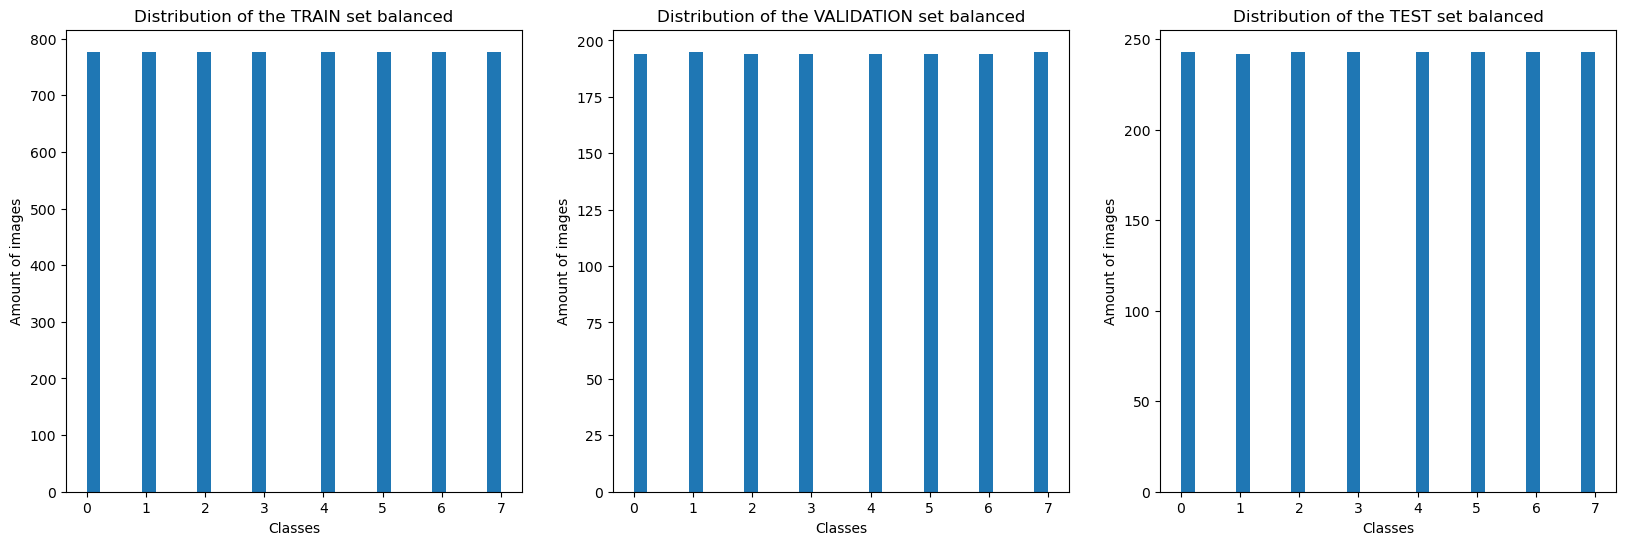

In [18]:
import matplotlib.pyplot as plt

# Plotting the y_ values to see how is the distribution
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
plt.hist(y_train, bins=30)
plt.title('Distribution of the TRAIN set balanced')
plt.xlabel('Classes')
plt.ylabel('Amount of images')

plt.subplot(1, 3, 2)
plt.hist(y_val, bins=30)
plt.title('Distribution of the VALIDATION set balanced')
plt.xlabel('Classes')
plt.ylabel('Amount of images')

plt.subplot(1, 3, 3)
plt.hist(y_test, bins=30)
plt.title('Distribution of the TEST set balanced')
plt.xlabel('Classes')
plt.ylabel('Amount of images')

plt.show()


## Training the model (train the logistic regression)

Training/fiting the models

### Baseline

In [21]:
# Baseline logistic regression
# Instantiate and fit to the remainder set
baseline_logreg = LogisticRegression(
    max_iter=10000,
    verbose=1,
    random_state=1
).fit(X_rem, y_rem)

# Print the accuracies
print(f'Accuracy on test set: {baseline_logreg.score(X_test, y_test)}')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        80008     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.61552D+04    |proj g|=  4.20140D+02


 This problem is unconstrained.



At iterate   50    f=  6.22614D+03    |proj g|=  6.37416D+01

At iterate  100    f=  5.11665D+03    |proj g|=  8.57104D+01

At iterate  150    f=  4.32232D+03    |proj g|=  2.35283D+01

At iterate  200    f=  3.62954D+03    |proj g|=  9.02483D+01

At iterate  250    f=  3.10628D+03    |proj g|=  3.09444D+01

At iterate  300    f=  2.73527D+03    |proj g|=  1.56353D+01

At iterate  350    f=  2.41346D+03    |proj g|=  8.53468D+00

At iterate  400    f=  2.14587D+03    |proj g|=  6.16893D+01

At iterate  450    f=  1.92938D+03    |proj g|=  2.06316D+01

At iterate  500    f=  1.78849D+03    |proj g|=  8.79583D+00

At iterate  550    f=  1.66929D+03    |proj g|=  6.46775D+00

At iterate  600    f=  1.61106D+03    |proj g|=  6.21929D+00

At iterate  650    f=  1.57095D+03    |proj g|=  9.92626D+00

At iterate  700    f=  1.53931D+03    |proj g|=  1.58678D+01

At iterate  750    f=  1.47408D+03    |proj g|=  5.30556D+00

At iterate  800    f=  1.41972D+03    |proj g|=  3.52033D+00

At iter

/Users/ottospigariol/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 18.6min finished


In [26]:
import pandas as pd

df_scores=pd.DataFrame(columns=['score'])

df_scores.loc[f"Baseline : C={baseline_logreg.get_params()['C']}"] = round(baseline_logreg.score(X_test, y_test),3)
df_scores

,score
Baseline : C=1.0,0.746


In [28]:
print(baseline_logreg.score(X_train, y_train))
print(baseline_logreg.score(X_test, y_test))

0.9998390989541432
0.7457539886773031


### Optimizing for C in Logistic Regression


#### One-Fold test

In [ ]:
# Range of C values
c_values = [.00001, .0001, .001, .01, .1, 1, 10, 100, 1000, 10000]

# Setting empty lists
train_accuracies = []
validation_accuracies = []

# Iterate over the C values
for value in c_values:

    # Instantiate a log reg and fit to the train set
    logreg = LogisticRegression(
        C=value,
        max_iter=10000,
        # n_jobs=-1,
        random_state=1,
        verbose=1,
    ).fit(X_train, y_train)

    # Score on the train set and append this accuracy to its respective list
    train_accuracies.append(logreg.score(X_train, y_train))

    # Score on the validation set and append this accuracy to its respective list
    validation_accuracies.append(logreg.score(X_val, y_val))

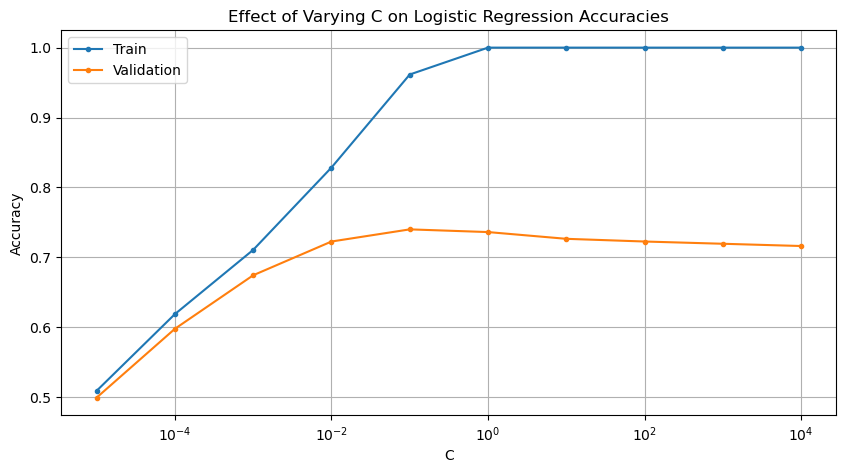

In [29]:
# Create a dataframe
scores_df=pd.DataFrame({'C value': c_values, 'train accuracy': train_accuracies, 'validation accuracy': validation_accuracies})

# Plot the accuracies
plt.figure(figsize=(10, 5))
plt.plot(c_values, train_accuracies, label='Train', marker='.')
plt.plot(c_values, validation_accuracies, label='Validation', marker='.')
plt.legend()
plt.title('Effect of Varying C on Logistic Regression Accuracies')
plt.xscale('log') # Put the x-axis on a log scale; this is important because the C values vary in orders of magnitude
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [30]:
best_c=c_values[np.argmax(validation_accuracies)]
best_c

0.1

In [31]:
# Instantiate a log reg and fit to the remainder set
validated_logreg = LogisticRegression(
    C=best_c,
    max_iter=10000,
    verbose=1,
    random_state=1
    ).fit(X_rem, y_rem)

# Print the test accuracy
print(f'Accuracy on test set: {validated_logreg.score(X_test, y_test)}')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        80008     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.61552D+04    |proj g|=  4.20140D+02

At iterate   50    f=  6.40758D+03    |proj g|=  3.80277D+01

At iterate  100    f=  5.66658D+03    |proj g|=  8.34018D+01

At iterate  150    f=  5.09932D+03    |proj g|=  3.15561D+01

At iterate  200    f=  4.82977D+03    |proj g|=  2.18847D+01

At iterate  250    f=  4.37483D+03    |proj g|=  5.86281D+01

At iterate  300    f=  4.16051D+03    |proj g|=  1.58847D+01

At iterate  350    f=  4.00745D+03    |proj g|=  1.18068D+01

At iterate  400    f=  3.87411D+03    |proj g|=  2.08474D+01

At iterate  450    f=  3.81508D+03    |proj g|=  6.49384D+00

At iterate  500    f=  3.77767D+03    |proj g|=  8.16462D+00

At iterate  550    f=  3.73888D+03    |proj g|=  5.89597D+00

At iterate  600    f=  3.72808D+03    |proj g|=  6.15275D+00

At iterate  650    f=  3.7

/Users/ottospigariol/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ottospigariol/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear


At iterate 3700    f=  3.56909D+03    |proj g|=  8.76871D-01

At iterate 3750    f=  3.56872D+03    |proj g|=  1.21589D+00

At iterate 3800    f=  3.56839D+03    |proj g|=  1.72801D+00

At iterate 3850    f=  3.56822D+03    |proj g|=  9.96488D-01

At iterate 3900    f=  3.56814D+03    |proj g|=  8.88706D-01

At iterate 3950    f=  3.56800D+03    |proj g|=  9.55692D-01

At iterate 4000    f=  3.56792D+03    |proj g|=  1.69490D+00

At iterate 4050    f=  3.56783D+03    |proj g|=  8.35389D-01

At iterate 4100    f=  3.56774D+03    |proj g|=  8.01470D-01

At iterate 4150    f=  3.56761D+03    |proj g|=  9.98809D-01

At iterate 4200    f=  3.56747D+03    |proj g|=  9.56221D-01

At iterate 4250    f=  3.56733D+03    |proj g|=  9.88973D-01

At iterate 4300    f=  3.56723D+03    |proj g|=  1.31373D+00

At iterate 4350    f=  3.56717D+03    |proj g|=  8.24319D-01

At iterate 4400    f=  3.56711D+03    |proj g|=  9.85384D-01

At iterate 4450    f=  3.56701D+03    |proj g|=  1.09721D+00

At iter

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 10.6min finished


In [32]:
df_scores.loc[f"One-Fold : C={validated_logreg.get_params()['C']}"]=round(validated_logreg.score(X_test, y_test),3)
df_scores

,score
Baseline : C=1.0,0.746
One-Fold : C=0.1,0.747


#### Cross validation

In [34]:
from sklearn.model_selection import cross_val_score

# Range of C values
c_values = [.00001, .0001, .001, .01, .1, 1, 10]

cv_accuracies = []

for value in c_values:

    # Instantiate a log reg
    logreg = LogisticRegression(
        C=value,
        max_iter=10000,
        n_jobs=-1,
        random_state=1 
    )

    # Pass the model and the remainder set into the cross-validation function, then get cross-validated accuracy by taking the mean
    cv_accuracy = np.mean(cross_val_score(logreg, X_rem, y_rem, cv=5, n_jobs=-1))

    # Append the cross-validated accuracy to the list set up above
    cv_accuracies.append(cv_accuracy)

    # Print something at the end of each iteration
    print(f'For a C value of {value}, the cross-validated accuracy is {round(cv_accuracy, 6)}')

For a C value of 1e-05, the cross-validated accuracy is 0.498904
For a C value of 0.0001, the cross-validated accuracy is 0.60162
For a C value of 0.001, the cross-validated accuracy is 0.670227
For a C value of 0.01, the cross-validated accuracy is 0.713863
For a C value of 0.1, the cross-validated accuracy is 0.744241
For a C value of 1, the cross-validated accuracy is 0.731626
For a C value of 10, the cross-validated accuracy is 0.723002


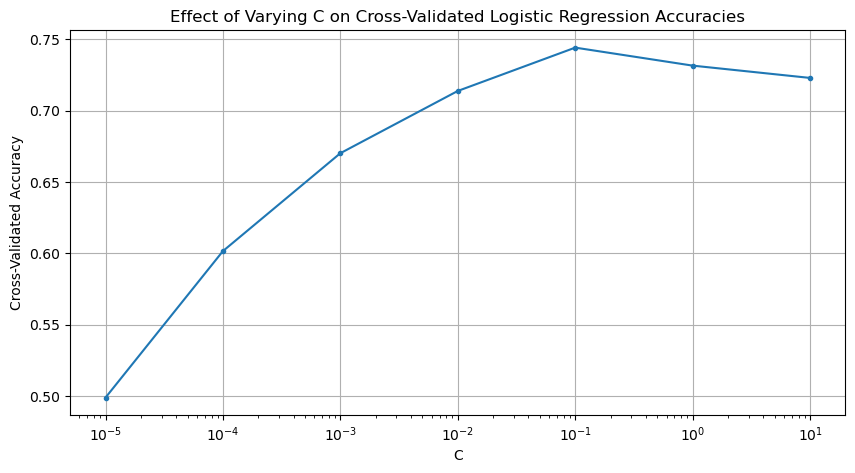

In [35]:
# Plot the accuracies
plt.figure(figsize=(10, 5))
plt.plot(c_values, cv_accuracies, marker = '.')
plt.title('Effect of Varying C on Cross-Validated Logistic Regression Accuracies')
plt.xscale('log') # Put the x-axis on a log scale; this is important because the C values vary in orders of magnitude
plt.xlabel('C')
plt.ylabel('Cross-Validated Accuracy')
plt.grid()
plt.show()

The optimal C value (using the cross-fold) is: 
* optimal C value of `0.1`

In [37]:
# BEST PARAMETER

# Instantiate a log reg and fit to the remainder set
cross_validated_logreg = LogisticRegression(
    C=0.1, 
    max_iter=10000,
    n_jobs=-1,
    random_state=1,
    verbose=1
    ).fit(X_rem, y_rem)

# Print the accuracies
print(f'Accuracy on remainder set: {cross_validated_logreg.score(X_rem, y_rem)}')
print(f'Accuracy on test set: {cross_validated_logreg.score(X_test, y_test)}')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        80008     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.61552D+04    |proj g|=  4.20140D+02


 This problem is unconstrained.



At iterate   50    f=  6.40758D+03    |proj g|=  3.80277D+01

At iterate  100    f=  5.66658D+03    |proj g|=  8.34022D+01

At iterate  150    f=  5.09910D+03    |proj g|=  3.16449D+01

At iterate  200    f=  4.79229D+03    |proj g|=  2.76532D+01

At iterate  250    f=  4.56621D+03    |proj g|=  1.51901D+01

At iterate  300    f=  4.33593D+03    |proj g|=  3.54753D+01

At iterate  350    f=  4.16269D+03    |proj g|=  1.48774D+01

At iterate  400    f=  3.99522D+03    |proj g|=  2.42225D+01

At iterate  450    f=  3.84802D+03    |proj g|=  2.78714D+01

At iterate  500    f=  3.79978D+03    |proj g|=  6.42700D+00

At iterate  550    f=  3.74727D+03    |proj g|=  1.33145D+01

At iterate  600    f=  3.72592D+03    |proj g|=  3.49634D+00

At iterate  650    f=  3.71678D+03    |proj g|=  4.52375D+00

At iterate  700    f=  3.70205D+03    |proj g|=  4.55910D+00

At iterate  750    f=  3.69699D+03    |proj g|=  5.83591D+00

At iterate  800    f=  3.69310D+03    |proj g|=  5.96322D+00

At iter

[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed: 20.2min finished


In [38]:
df_scores.loc[f"5-Fold : C={cross_validated_logreg.get_params()['C']}"]=round(cross_validated_logreg.score(X_test, y_test),3)
df_scores

,score
Baseline : C=1.0,0.746
One-Fold : C=0.1,0.747
5-Fold : C=0.1,0.745


/Users/ottospigariol/anaconda3/envs/deeplearning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
# # #To save the model after training
# import joblib

# # # Save the model
# joblib.dump(cross_validated_logreg, 'logistic_regression_model_bestC01_lbfgs_l2.pkl')

['logistic_regression_model_bestC01_lbfgs_l2.pkl']

## Evaluate the model

Seeing how the model peform with the train and test data:

In [40]:
# Evaluating the model
y_pred = cross_validated_logreg.predict(X_test)
y_pred_train = cross_validated_logreg.predict(X_rem)

accuracy_test = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_rem, y_pred_train)
print("Accuracy test:", accuracy_test)
print("Accuracy train:", accuracy_train)

Accuracy test: 0.7452393206381883
Accuracy train: 0.9531471231818767


### classification_report

In [43]:
from sklearn.metrics import classification_report

y_pred = cross_validated_logreg.predict(X_test)
report_initial = classification_report(y_test, y_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       0.73      0.74      0.73       243
           1       0.73      0.70      0.72       242
           2       0.51      0.50      0.50       243
           3       0.69      0.71      0.70       243
           4       0.72      0.65      0.69       243
           5       0.78      0.78      0.78       243
           6       0.82      0.89      0.85       243
           7       0.97      1.00      0.98       243

    accuracy                           0.75      1943
   macro avg       0.74      0.75      0.74      1943
weighted avg       0.74      0.75      0.74      1943



### Confusion Matrix 

Plotting the confusion Matrix (as a porcentage) and observate the classification from the model

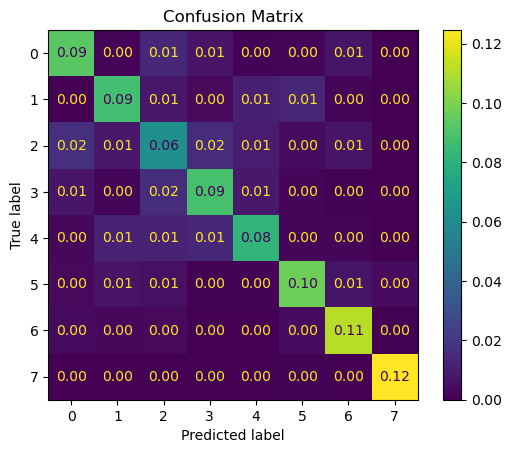

In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='all', values_format='.2f')
plt.title('Confusion Matrix')
plt.show()


### One-vs-Rest (OvR) multiclass ROC

Evaluating the ROC-AUC from the models.

Using the LabelBinarizer to normalize the data, calculationg the micro and macro average and plotting all classes to see theirs respective curves/values.


More information at: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

In [45]:
from sklearn.preprocessing import LabelBinarizer

# use a LabelBinarizer to binarize the target by one-hot-encoding in a OvR fashion.
# This means that the target of shape (n_samples,) is mapped to a target of shape (n_samples, n_classes).

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

# #check the encoding of a specific class: #SanityCheck
# label_binarizer.transform([1])

(1943, 8)

In [46]:
cells = {
    0 : 'basophil',
    1 : 'eosinophil',
    2 : 'erythroblast',
    3 : 'ig',
    4 : 'lymphocyte',
    5 : 'monocyte',
    6 : 'neutrophil',
    7 : 'platelet',
}

In [47]:
logreg=cross_validated_logreg

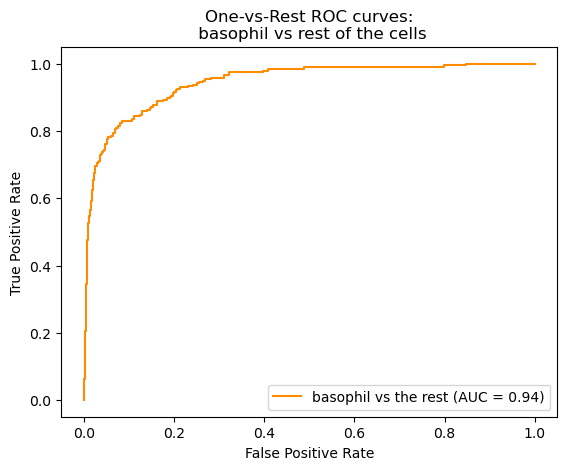

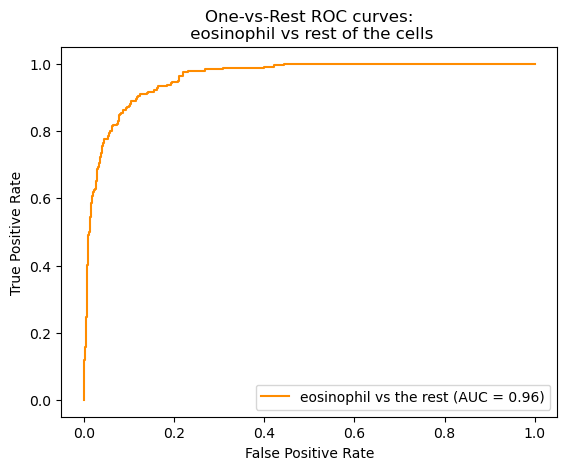

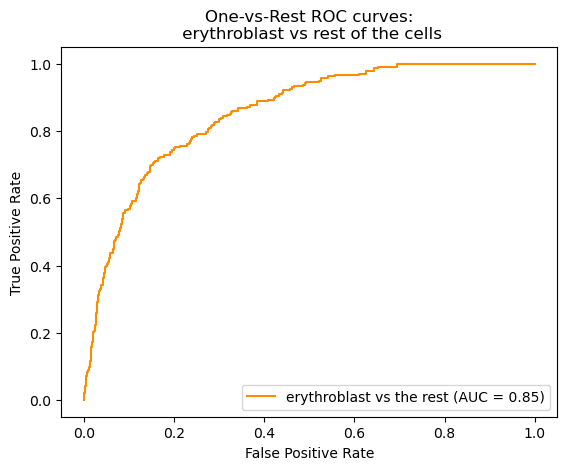

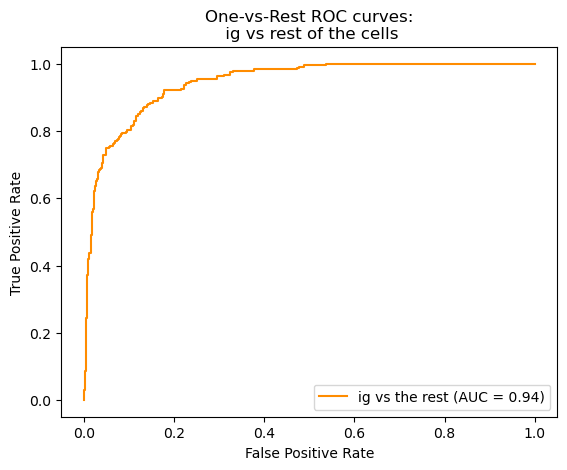

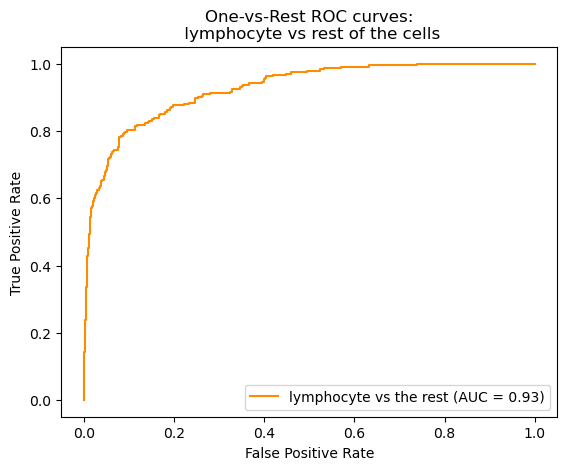

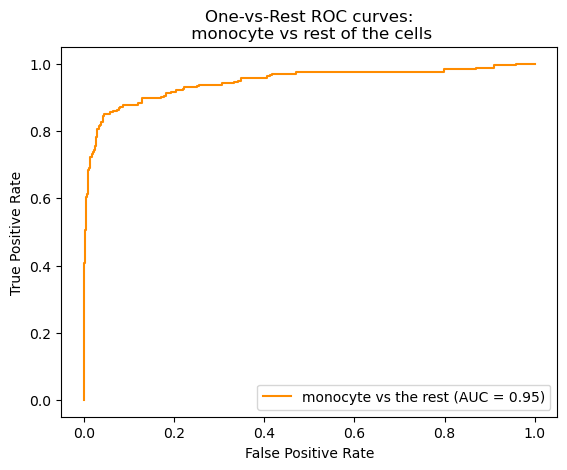

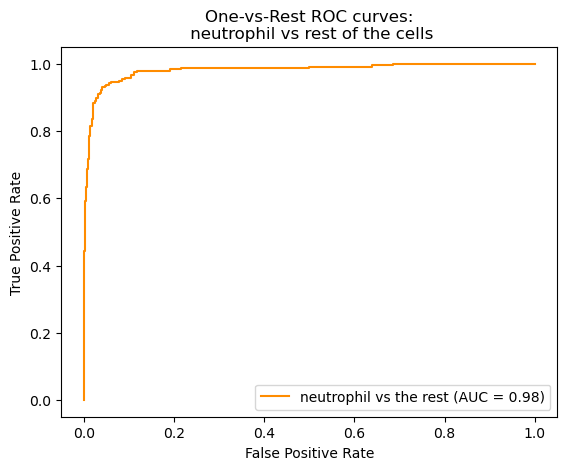

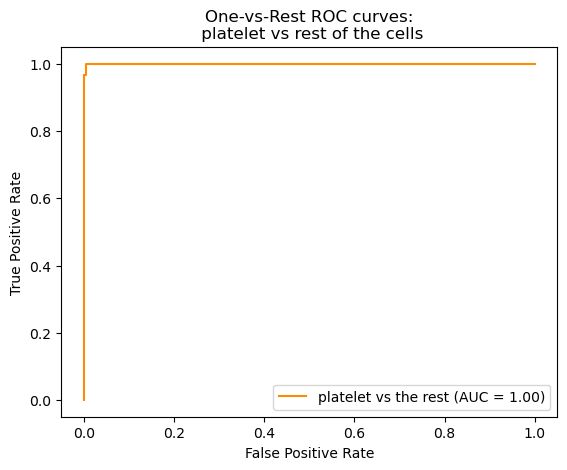

In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

y_score = logreg.predict_proba(X_test)
# y_score= (logreg.predict_proba(X_test)[:, class_id] >= 0.9).astype(int) 
# print(y_pred_new_threshold)

for i in range(0,8):
    display = RocCurveDisplay.from_predictions(
        y_onehot_test[:, i],
        y_score[:, i],
        name=f"{cells[i]} vs the rest",
        color="darkorange",
    )
    _ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title='One-vs-Rest ROC curves:\n {} vs rest of the cells'.format(cells[i]),
)


In [49]:
from sklearn.metrics import auc, roc_curve, roc_auc_score

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

# ---------------------
# Can also evaluate with the build-in method, but for the next plot we need to have the variables

# micro_roc_auc_ovr = roc_auc_score(
#     y_test,
#     y_score,
#     multi_class="ovr",
#     average="micro",
# )

# print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{micro_roc_auc_ovr:.2f}")


Micro-averaged One-vs-Rest ROC AUC score:
0.95


In [50]:
# ROC curve using the OvR macro-average

n_classes = 8
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

# ---------------------
# Can also evaluate with the build-in method, but for the next plot we need to have the variables
# macro_roc_auc_ovr = roc_auc_score(
#     y_test,
#     y_score,
#     multi_class="ovr",
#     average="macro",
# )
# print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{macro_roc_auc_ovr:.2f}")


Macro-averaged One-vs-Rest ROC AUC score:
0.94


NOTE : In a multi-class classification setup with highly imbalanced classes, micro-averaging is preferable over macro-averaging. In such cases, one can alternatively use a weighted macro-averaging, not demoed here.

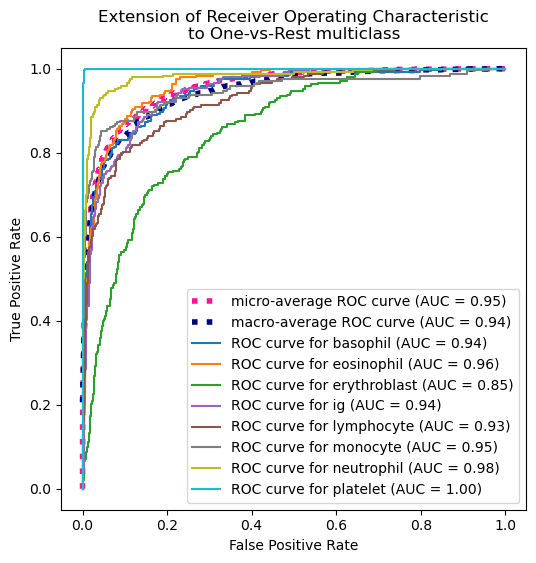

In [51]:
from itertools import cycle

fig, ax = plt.subplots(figsize=(6, 6))

#Plotting micro-avg Roc curve
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

# Plotting Macro-AVG Roc curve
plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

# Classes numbers
n_classes = 8

# Generate a color palette
colors = cycle(plt.cm.tab10(np.linspace(0, 1, n_classes)))

for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"ROC curve for {cells[class_id]}",
        color=color,
        ax=ax,
    )

_ = ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass",
)

#reference: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

## Using the model to predict the specifics images

In [35]:
# Load the model 

# logreg = joblib.load('../models/logistic_regression_model.pkl')
# result = logreg.score(X_test, y_test)
# print(result)

In [36]:
filename = '../datasets/dataset_normal/basophil/BA_47.jpg'
# filename = '../datasets/dataset_normal/neutrophil/BNE_715.jpg'

cells = {
    0 : 'basophil',
    1 : 'eosinophil',
    2 : 'erythroblast',
    3 : 'ig',
    4 : 'lymphocyte',
    5 : 'monocyte',
    6 : 'neutrophil',
    7 : 'platelet',
}

img = cv2.imread(os.path.join(filename))
img = cv2.resize(img, (100, 100))  # Resize image
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
X = img.flatten()  # Flatten image
X = X / 255.0  

result = logreg.predict([X])
print(f"The cell that was detect was: {cells[result[0]]}")

The cell that was detect was: basophil
